In [1]:
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm_notebook as tqdm
import os
import glob
from IPython.display import display 
from PIL import Image

Using TensorFlow backend.
/home/rodrigo/python-virtual-environments/changEat/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rodrigo/python-virtual-environments/changEat/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rodrigo/python-virtual-environments/changEat/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype

In [32]:
train_path = "dataset/train"

# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print("Training products: {}".format(train_labels))

Training products: ['banana', 'barrita de cereal', 'coca cola', 'flynn paff', 'galletitas toddy', 'kitkat', 'turron de mani']


In [34]:
train_image = []
train_label = []

pbar = tqdm(total=len(train_labels))
# loop over the training data sub-folders
label = 0
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    image_paths = glob.glob(dir + "/*.jpg")
    
    for image_path in image_paths:
        img = image.load_img(image_path, target_size=(28,28,1))
        img = image.img_to_array(img)
        img = img/255
        train_image.append(img)
        train_label.append(label)
        
    label += 1
    pbar.update(1)
        
X = np.array(train_image)

Y = np.array(train_label)

/home/rodrigo/python-virtual-environments/changEat/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [35]:
Y = to_categorical(Y)

# Define model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [37]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_labels), activation='softmax'))

In [38]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Train model

In [76]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Train on 425 samples, validate on 107 samples
Epoch 1/30
425/425 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.7512 - val_accuracy: 0.6168
Epoch 2/30
425/425 [==============================] - 1s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 2.7003 - val_accuracy: 0.6075
Epoch 3/30
425/425 [==============================] - 2s 4ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.6557 - val_accuracy: 0.6075
Epoch 4/30
425/425 [==============================] - 1s 4ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 2.7650 - val_accuracy: 0.5794
Epoch 5/30
425/425 [==============================] - 1s 3ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 2.9041 - val_accuracy: 0.5327
Epoch 6/30
425/425 [==============================] - 1s 3ms/step - loss: 0.0057 - accuracy: 0.9976 - val_loss: 2.6307 - val_accuracy: 0.5607
Epoch 7/30
425/425 [==============================] - 1s 3ms/step - loss: 0.0122 - accuracy: 0.9953 - 

# Prediction

In [77]:
test_path  = "dataset/test"

In [78]:
test_image = []

for image_path in glob.glob(test_path + "/*.jpg"):
    img = image.load_img(image_path, target_size=(28,28,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
    
test = np.array(test_image)

In [79]:
# making predictions
prediction = model.predict_classes(test)

In [80]:
prediction

array([3, 4, 5, 6, 1])

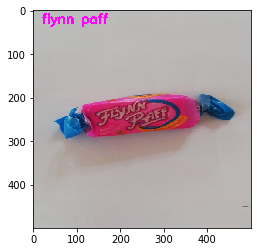

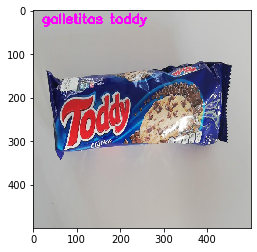

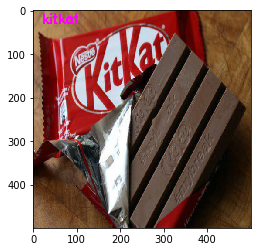

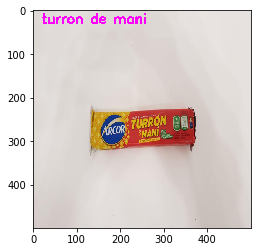

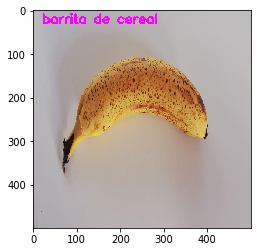

In [81]:
for image_path, pred_index in zip(glob.glob(test_path + "/*.jpg"), prediction): 
    img = cv2.imread(image_path)
    
    # resize the image
    img = cv2.resize(img, tuple((500, 500)))
    
    # show predicted label on image
    cv2.putText(img, train_labels[pred_index], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,0,255), 3)

    # display the output image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()